In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

## 15 minutes

In [13]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    'uv_sigma_line_eg_15T', 15, normalize_time=True, custom_dates=False)

In [14]:
period_constraint_short1 = gpytorch.constraints.Interval(0.01145, 0.01146)
per1 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short1)
period_constraint_short2 = gpytorch.constraints.Interval(0.01354, 0.01355)
per2 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short2)
period_constraint_short3 = gpytorch.constraints.Interval(0.01562, 0.01563)
per3 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short3)

variation = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())

covar_module = gpytorch.kernels.ScaleKernel(per1 + per2 + per3) + variation

Iter 1 , Loss = 1.4214418665680622 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.4202163453649699 , Noise = 0.698259711265564
Iter 3 , Loss = 1.4190289839133163 , Noise = 0.7032914757728577
Iter 4 , Loss = 1.417879964250164 , Noise = 0.7083384990692139
Iter 5 , Loss = 1.4167693503661634 , Noise = 0.7133963108062744
Iter 6 , Loss = 1.4156971370673983 , Noise = 0.7184606194496155
Iter 7 , Loss = 1.4146632582243177 , Noise = 0.7235265970230103
Iter 8 , Loss = 1.4136676639617904 , Noise = 0.7285893559455872
Iter 9 , Loss = 1.4127098455865108 , Noise = 0.7336438894271851
Iter 10 , Loss = 1.4117895895658172 , Noise = 0.7386850714683533
Iter 11 , Loss = 1.4109064004923997 , Noise = 0.7437075972557068
Iter 12 , Loss = 1.4100598207001351 , Noise = 0.7487059235572815
Iter 13 , Loss = 1.4092493040322447 , Noise = 0.7536745667457581
Iter 14 , Loss = 1.408473961709859 , Noise = 0.7586079835891724
Iter 15 , Loss = 1.4077331256946986 , Noise = 0.7635005116462708
Iter 16 , Loss = 1.4070259528702382 ,

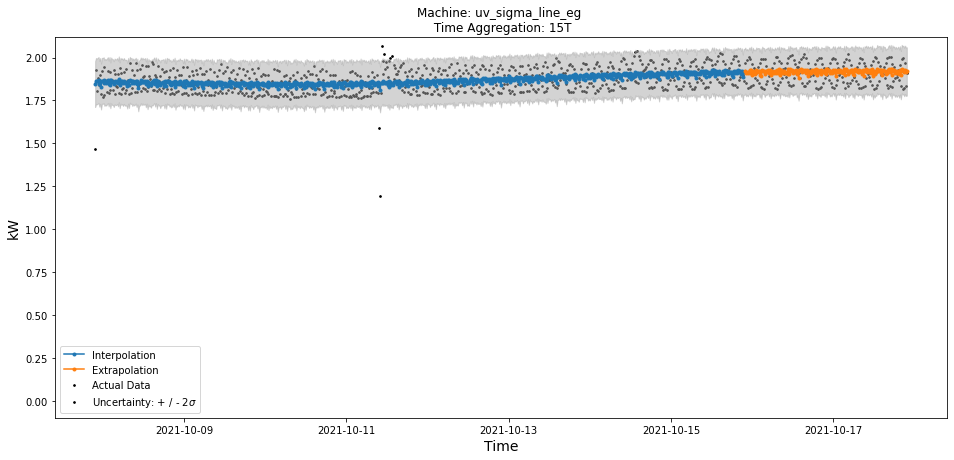

Abnormal High Energy Consumption
---------------------------------
2021-10-11T10:30:00.000000000 2.0660362312197837
2021-10-11T11:15:00.000000000 2.0217764279957846
2021-10-11T13:00:00.000000000 1.996927750906214
2021-10-11T13:30:00.000000000 2.0068204396108356


Abnormal Low Energy Consumption
---------------------------------
2021-10-07T21:45:00.000000000 1.465684955307262
2021-10-11T09:45:00.000000000 1.5901446904894707
2021-10-11T10:00:00.000000000 1.1931376236059537


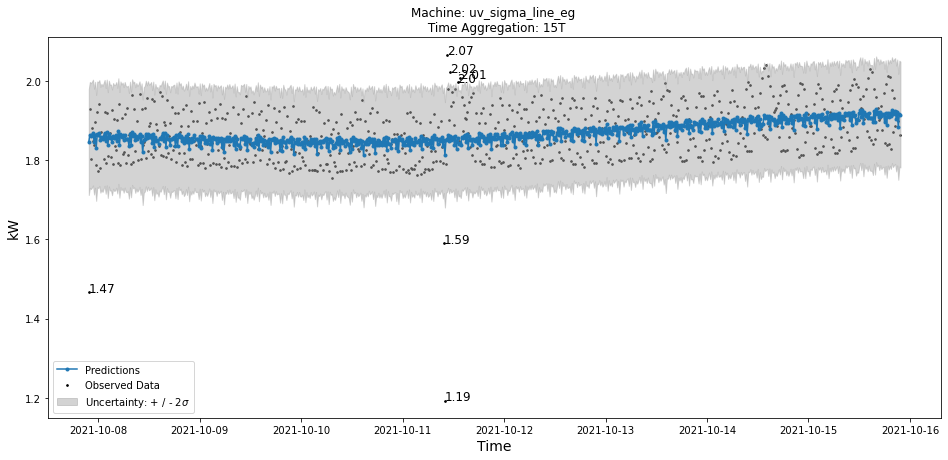

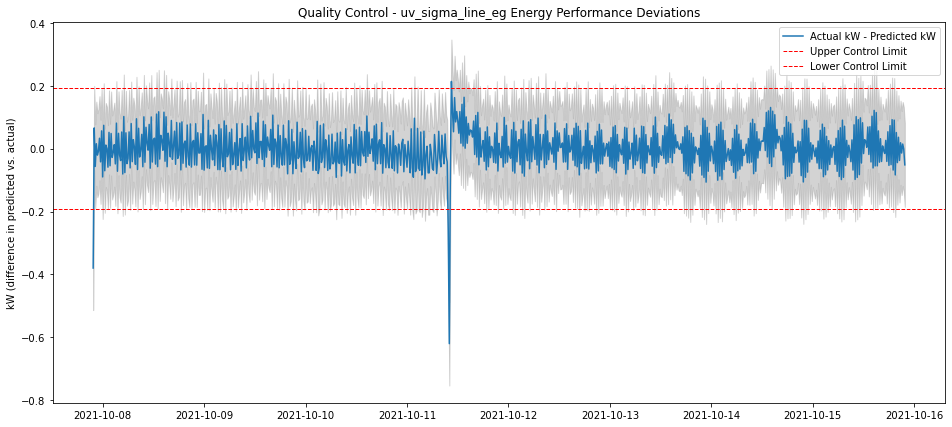

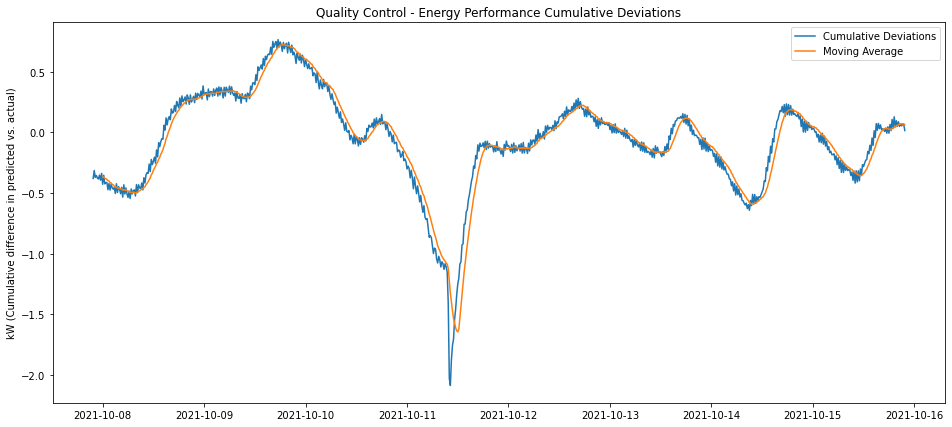

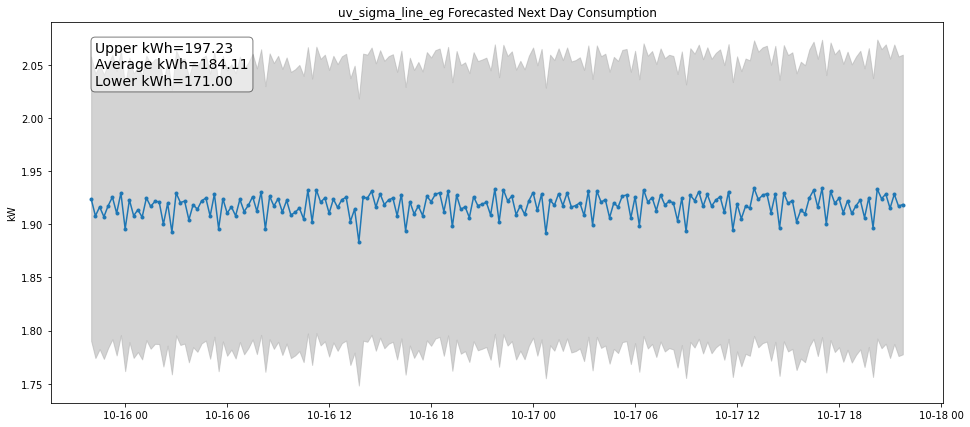

In [15]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    lr=0.01,
    training_iter=100,
    time_agg='15T',
    machine='uv_sigma_line_eg',
    update_score=False
)   

In [12]:
mse, mape

(0.003884406956930969, 0.02835507772170136)